1. 당뇨병 데이터를 가지고 머신러닝 5가지 분류를 수행.(SVM, LR, RF, DT, KNN)

2. 동일한 데이터로 딥러닝 분류 수행하라. (dense layer 만 사용)

## 3. 해당 데이터에서 Outcome을 삭제하고 BMI를 예측하는 회귀를 수행하라.

4. 3번과 동일하지만 dense layer만 사용한 신경만으로 회귀를 수행하라.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/syk98/Desktop/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


## data 확인

In [7]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


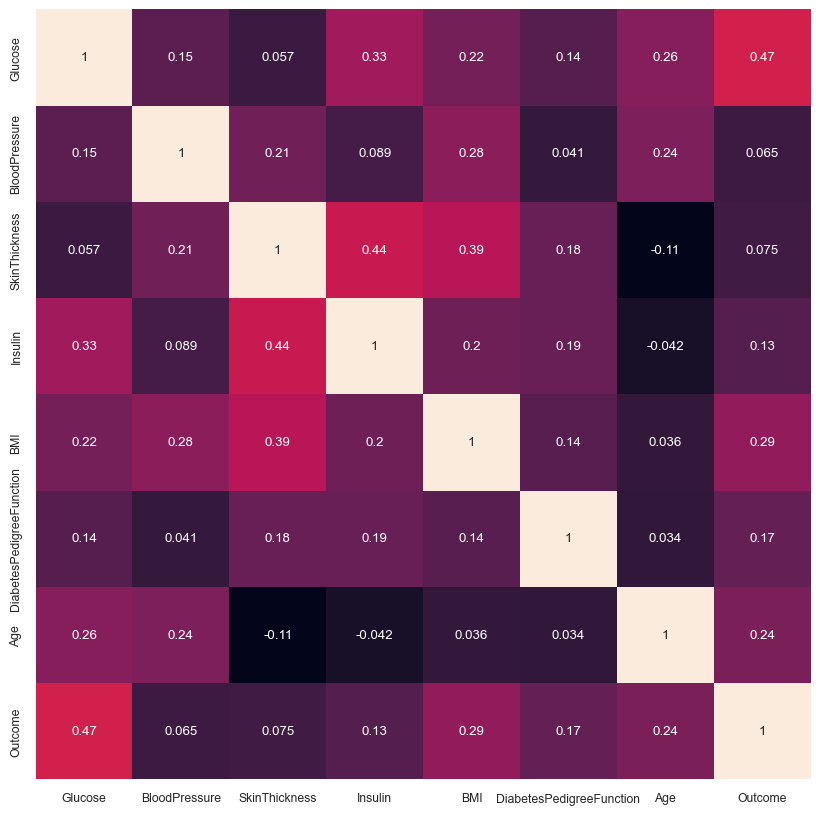

In [42]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## data/label & train/test dataset 나누기

In [85]:
X = df.drop('BMI',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,
6,148,72,35,0,0.627,50,1
1,85,66,29,0,0.351,31,0
8,183,64,0,0,0.672,32,1
1,89,66,23,94,0.167,21,0
0,137,40,35,168,2.288,33,1


In [87]:
y = df['BMI']
y.head()

Pregnancies
6    33.6
1    26.6
8    23.3
1    28.1
0    43.1
Name: BMI, dtype: float64

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 7) (614,)
(154, 7) (154,)


## 모델 생성, 예측, 분류

In [92]:
from sklearn.metrics import mean_squared_error

## SVM

In [105]:
from sklearn.svm import SVR

rg_svm = SVR(kernel='linear')
rg_svm.fit(X_train, y_train)

pred_svm = rg_svm.predict(X_test)
print('평균제곱오차', mean_squared_error(pred_svm, y_test))

평균제곱오차 46.202543100475516


## LR

In [108]:
from sklearn.linear_model import LinearRegression

rg_lr = LinearRegression()
rg_lr.fit(X_train, y_train)

pred_lr = rg_lr.predict(X_test)
print('평균제곱오차', mean_squared_error(pred_lr, y_test))

평균제곱오차 47.0639525782539


## RF

In [111]:
from sklearn.ensemble import RandomForestRegressor

rg_rf = RandomForestRegressor(random_state=42)
rg_rf.fit(X_train, y_train)

pred_rf = rg_rf.predict(X_test)
print('평균제곱오차', mean_squared_error(pred_rf, y_test))

평균제곱오차 43.573774220779214


## DT

In [113]:
from sklearn.tree import DecisionTreeRegressor

rg_dt = DecisionTreeRegressor(random_state=42)
rg_dt.fit(X_train, y_train)

pred_dt = rg_dt.predict(X_test)
print('평균제곱오차', mean_squared_error(pred_dt, y_test))

평균제곱오차 85.14090909090909


## KNN

In [116]:
from sklearn.neighbors import KNeighborsRegressor

rg_knn = KNeighborsRegressor()
rg_knn.fit(X_train, y_train)

pred_knn = rg_knn.predict(X_test)
print('평균제곱오차', mean_squared_error(pred_knn, y_test))

평균제곱오차 43.55855584415584
